In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/Users/richietownsend/Nashville Software School/NSS_Data_Analytics/Capstone/data/LA Metro"
list=[]
for (root, dirs, file) in os.walk(path):
    for f in file:
        if '.csv' in f:
            print('pd.read_csv(\'../data/LA Metro/'+f+'\')')

pd.read_csv('../data/LA Metro/metro-trips-2021-q1.csv')
pd.read_csv('../data/LA Metro/metro-trips-2020-q2-v2.csv')
pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q2.csv')
pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q3.csv')
pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q1.csv')
pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q4.csv')
pd.read_csv('../data/LA Metro/metro-trips-2020-q3.csv')
pd.read_csv('../data/LA Metro/metro-trips-2020-q4.csv')
pd.read_csv('../data/LA Metro/metro-bike-share-trips-2020-q1.csv')


In [3]:
la_metroQ119 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q1.csv')
la_metroQ219 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q2.csv')
la_metroQ319 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q3.csv')
la_metroQ419 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q4.csv')
la_metroQ120 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2020-q1.csv')
la_metroQ220 = pd.read_csv('../data/LA Metro/metro-trips-2020-q2-v2.csv')
la_metroQ320 = pd.read_csv('../data/LA Metro/metro-trips-2020-q3.csv')
la_metroQ420 = pd.read_csv('../data/LA Metro/metro-trips-2020-q4.csv')
la_metroQ121 = pd.read_csv('../data/LA Metro/metro-trips-2021-q1.csv')

/Users/richietownsend/opt/miniconda3/envs/geospatial/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
la_metroQ119.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57358 entries, 0 to 57357
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              57358 non-null  int64  
 1   duration             57358 non-null  int64  
 2   start_time           57358 non-null  object 
 3   end_time             57358 non-null  object 
 4   start_station        57358 non-null  int64  
 5   start_lat            56830 non-null  float64
 6   start_lon            56830 non-null  float64
 7   end_station          57358 non-null  int64  
 8   end_lat              55927 non-null  float64
 9   end_lon              55927 non-null  float64
 10  bike_id              57358 non-null  object 
 11  plan_duration        57358 non-null  int64  
 12  trip_route_category  57358 non-null  object 
 13  passholder_type      57358 non-null  object 
 14  bike_type            57358 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

In [5]:
la_metroQ121.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40858 entries, 0 to 40857
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              40858 non-null  int64  
 1   duration             40858 non-null  int64  
 2   start_time           40858 non-null  object 
 3   end_time             40858 non-null  object 
 4   start_station        40858 non-null  int64  
 5   start_lat            40804 non-null  float64
 6   start_lon            40804 non-null  float64
 7   end_station          40858 non-null  int64  
 8   end_lat              39624 non-null  float64
 9   end_lon              39624 non-null  float64
 10  bike_id              40858 non-null  object 
 11  plan_duration        40858 non-null  int64  
 12  trip_route_category  40858 non-null  object 
 13  passholder_type      40858 non-null  object 
 14  bike_type            40858 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

In [6]:
all_metro = pd.concat([la_metroQ119, la_metroQ219, la_metroQ319, la_metroQ419, la_metroQ120, la_metroQ220, la_metroQ320, la_metroQ420, la_metroQ121])

In [7]:
all_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541174 entries, 0 to 40857
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              541174 non-null  int64  
 1   duration             541174 non-null  int64  
 2   start_time           541174 non-null  object 
 3   end_time             541174 non-null  object 
 4   start_station        541174 non-null  int64  
 5   start_lat            532508 non-null  float64
 6   start_lon            532508 non-null  float64
 7   end_station          541174 non-null  int64  
 8   end_lat              520414 non-null  float64
 9   end_lon              520414 non-null  float64
 10  bike_id              541174 non-null  object 
 11  plan_duration        541174 non-null  int64  
 12  trip_route_category  541174 non-null  object 
 13  passholder_type      536448 non-null  object 
 14  bike_type            541174 non-null  object 
dtypes: float64(4), int

In [8]:
all_metro = all_metro[['trip_id', 'start_time', 'end_time', 'start_station', 'end_station']]

In [9]:
all_metro.head()

,trip_id,start_time,end_time,start_station,end_station
0,112536773,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051
1,112536772,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051
2,112538689,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075
3,112538688,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075
4,112538687,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075


In [10]:
all_metro['start_time'] = pd.to_datetime(all_metro['start_time'], infer_datetime_format=True)
all_metro['end_time'] = pd.to_datetime(all_metro['end_time'], infer_datetime_format=True)
# divvyQ119['end_time'] = pd.to_datetime(divvyQ119['end_time'], format='%Y-%m-%d')

In [11]:
all_metro['duration'] = all_metro['end_time'] - all_metro['start_time']

In [12]:
all_metro = all_metro.dropna(subset=['start_station'])
all_metro = all_metro.dropna(subset=['end_station'])
all_metro = all_metro[~((all_metro['start_station'] == all_metro['end_station']) & (all_metro['duration'] < '00:05:00'))]

In [13]:
all_metro.head()

,trip_id,start_time,end_time,start_station,end_station,duration
0,112536773,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,0 days 00:07:00
1,112536772,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,0 days 00:06:00
2,112538689,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,0 days 00:32:00
3,112538688,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,0 days 00:30:00
4,112538687,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,0 days 00:28:00


In [14]:
all_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525844 entries, 0 to 40857
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   trip_id        525844 non-null  int64          
 1   start_time     525844 non-null  datetime64[ns] 
 2   end_time       525844 non-null  datetime64[ns] 
 3   start_station  525844 non-null  int64          
 4   end_station    525844 non-null  int64          
 5   duration       525844 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), timedelta64[ns](1)
memory usage: 28.1 MB


Create Date Column

In [15]:
all_metro['start_date'] = all_metro['start_time'].dt.date

In [18]:
metro_by_date = all_metro.groupby('start_date').agg({'trip_id': 'count'}).reset_index()
metro_by_date['start_date'] = pd.to_datetime(metro_by_date['start_date'], format='%Y-%m-%d')
metro_by_date.rename(columns={'trip_id':'ride_count'}, inplace=True)

In [19]:
metro_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  821 non-null    datetime64[ns]
 1   ride_count  821 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.0 KB


In [20]:
metro_by_date['month'] = metro_by_date['start_date'].dt.month
metro_by_date['year'] = metro_by_date['start_date'].dt.year

In [21]:
metro_by_date['m_y'] = metro_by_date['month'].apply(str) + "-" + metro_by_date['year'].apply(str) 

In [22]:
metro_by_date

,start_date,ride_count,month,year,m_y
0,2019-01-01,501,1,2019,1-2019
1,2019-01-02,666,1,2019,1-2019
2,2019-01-03,723,1,2019,1-2019
3,2019-01-04,797,1,2019,1-2019
4,2019-01-05,273,1,2019,1-2019
...,...,...,...,...,...
816,2021-03-27,719,3,2021,3-2021
817,2021-03-28,695,3,2021,3-2021
818,2021-03-29,478,3,2021,3-2021
819,2021-03-30,487,3,2021,3-2021


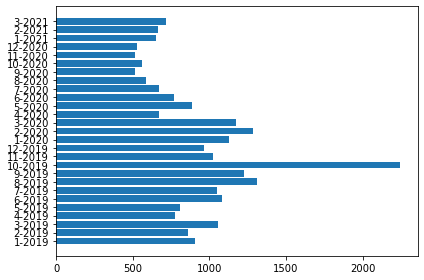

In [23]:
plt.barh('m_y', 'ride_count', data=metro_by_date)
plt.tight_layout()

In [24]:
metro_by_date.to_csv('metro_by_date.csv')